In [322]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

# Predicting an Astrometric signal

## Calculating velocity of the star

Proper motion and distance are given

In [323]:
proper_motion_mas_yr = 50
proper_motion_as_yr = proper_motion_mas_yr * 0.001
print('The proper motion is:',proper_motion_as_yr,'as/year ')

D = 50
print('The distance to the star is',D,'pc')

The proper motion is: 0.05 as/year 
The distance to the star is 50 pc


Use the equation $v_T=4.74D\mu$

In [324]:
v_star_kms = 4.74*proper_motion_as_yr*D
v_star_AUyear = v_star_kms * (1/1.496e+8) * (3.154e+7)
print('The velocity of the star is',v_star_kms,'km/s or',v_star_AUyear,'AU/years')

The velocity of the star is 11.850000000000001 km/s or 2.4983221925133696 AU/years


Setting the timescale as 4.2 years 

In [325]:
timescale = 30

Variables I set 

In [326]:
m_star = 2 # M_sun
z_star = 5 # AU

## Simulation WITHOUT planet 

Creating a simulation with units of AU, M$_\odot$ and years where the central object is the Sun and the other objects are the Earth and a star

In [327]:
sim = rebound.Simulation()                                         # starting simulation named sim 

sim.units=["msun","AU","year"]                                     # setting units of sim 

sim.add(m=1)                                                       # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                                     # add Earth in a 1 AU circular orbit 

sim.add(x = 1.031e7, vy = v_star_AUyear, m = m_star, z = z_star)   # add a hypothetical star 50 pc away with calculated velocity 

Creating arrays to hold data 

In [328]:
m = 5
times = np.linspace(0,timescale,num=m)

# positions of sun, earth, star and sun-earth COM
pos_sun = np.zeros((m,3))
pos_earth = np.zeros((m,3))
pos_star = np.zeros((m,3))

# center of mass 
sun_earth_com = np.zeros((m,3))
all_com = np.zeros((m,3))

# r_star - r_earth vector
r_SE = np.zeros((m,3))

# length of r_star - r_earth vector in x-y plane
r_SE_xy = np.zeros((m,1))

# right ascension and declination
alpha = np.empty((m,1))
delta = np.empty((m,1))

Creating a for loop to fill the arrays that were created

In [329]:
for i,t in enumerate(times):
    sim.integrate(t)
    
    # positions of sun, earth and star
    pos_sun[i] = sim.particles[0].xyz
    pos_earth[i] = sim.particles[1].xyz
    pos_star[i] = sim.particles[2].xyz
    
    # center of mass of sun and earth 
    com = sim.calculate_com(last=2)
    sun_earth_com[i] = com.xyz
    
    # center of mass of all objects 
    com_all = sim.calculate_com()
    all_com[i] = com_all.xyz
    
    # r_star - r_earth vector 
    r_SE[i] = pos_star[i] - pos_earth[i]
    
    #length of r_star - r_earth vector in x-y plane
    r_SE_xy[i] = np.sqrt(r_SE[i,0]**2 + r_SE[i,1]**2)
    
    # calculating RA and Dec in (units)
    alpha[i] = (r_SE[i,1]/r_SE[i,0])*206264806.24709466
    delta[i] = (r_SE[i,2]/r_SE_xy[i])*206264806.24709466

Creating a plot for the positions of the Sun and Earth

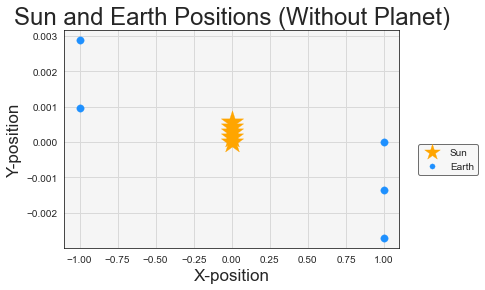

In [330]:
plt.clf()   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

#################################### plotting data #######################################################
# plotting sun and earth
plt.scatter(pos_sun[:,0], pos_sun[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.scatter(pos_earth[:,0], pos_earth[:,1], color='dodgerblue', label='Earth', s=55)

############################################################################################################ 

# setting titles
plt.title('Sun and Earth Positions (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.7, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show()  

Creating a plot of the position of the star

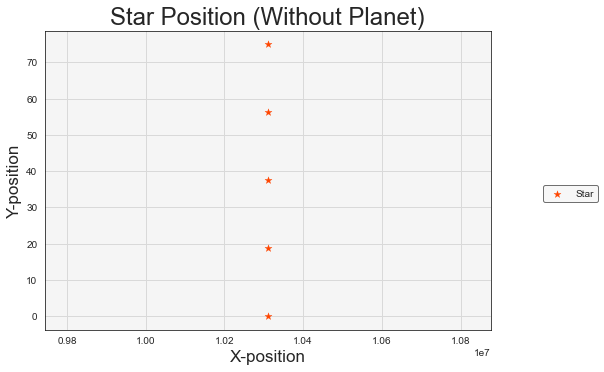

In [331]:
plt.clf() 

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

#################################### plotting data #######################################################
# plotting star position
plt.scatter(pos_star[:,0], pos_star[:,1] , color='orangered', label='Star', s=55, marker='*') 
############################################################################################################ 

# setting titles
plt.title('Star Position (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show()  

## Simulation WITH planet

Creating a simulation with units of AU, M$_\odot$ and years where the central object is the Sun and the other objects are the Earth and a star with a planet orbiting it

In [332]:
sim_wp = rebound.Simulation()                                                # create a simulation called sim_wp 

sim_wp.units=["msun","AU","year"]                                            # setting the units for sim_wpm

sim_wp.add(m=1)                                                              # add Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                            # add Earth in a 1 AU circular orbit 

sim_wp.add(x = 1.031e7, vy=v_star_AUyear, m = m_star, z = z_star)            # add a hypothetical star 50 pc away with calculated velocity

sim_wp.add(m = 0.00477294, a = 0.6, e = 0.2, primary = sim_wp.particles[2])  # add planet from figure 3.1 caption and have it orbit the star 

Creating arrays to hold data 

In [333]:
# positions of sun, earth, star and sun-earth COM
pos_sun_wp = np.zeros((m,3))
pos_earth_wp = np.zeros((m,3))
pos_star_wp = np.zeros((m,3))
pos_planet_wp = np.zeros((m,3))

# center of mass 
sun_earth_com_wp = np.zeros((m,3))
all_com_wp = np.zeros((m,3))

# r_star - r_earth vector
r_SE_wp = np.zeros((m,3))

# length of r_star - r_earth vector in x-y plane 
r_SE_xy_wp = np.zeros((m,1))

# right ascension and declination
alpha_wp = np.empty((m,1))
delta_wp = np.empty((m,1))

Filling arrays with data using a for loop

In [334]:
for j,t in enumerate(times):
    sim_wp.integrate(t)
    
    # positions of sun, earth and star
    pos_sun_wp[j] = sim_wp.particles[0].xyz
    pos_earth_wp[j] = sim_wp.particles[1].xyz
    pos_star_wp[j] = sim_wp.particles[2].xyz
    pos_planet_wp[j] = sim_wp.particles[3].xyz
    
    # center of mass of sun and earth 
    com_wp = sim_wp.calculate_com(last=2)
    sun_earth_com_wp[j] = com_wp.xyz
    
    # center of mass of all objects 
    com_all_wp = sim_wp.calculate_com()
    all_com_wp[j] = com_all_wp.xyz
    
    # r_star - r_earth vector 
    r_SE_wp[j] = pos_star_wp[j] - pos_earth_wp[j]
    
    #length of r_star - r_earth vector in x-y plane
    r_SE_xy_wp[j] = np.sqrt(r_SE_wp[j,0]**2 + r_SE_wp[j,1]**2)
    
    # calculating RA and Dec in (units)
    alpha_wp[j] = (r_SE_wp[j,1]/r_SE_wp[j,0])*206264806.24709466
    delta_wp[j] = (r_SE_wp[j,2]/r_SE_xy_wp[j])*206264806.24709466

Creating a plot for the positions of the sun and earth

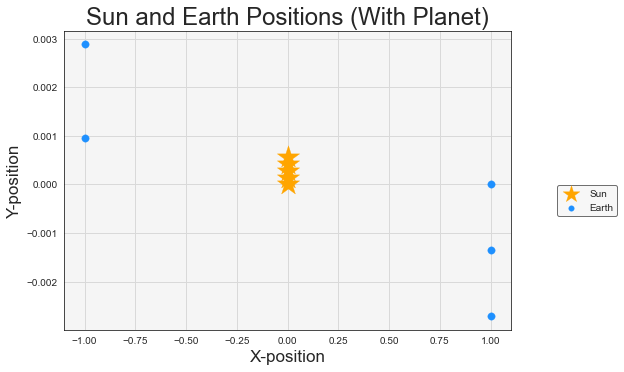

In [335]:
plt.clf()  

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

#################################### plotting data #######################################################
# plotting sun and earth positions 
plt.scatter(pos_sun_wp[:,0], pos_sun_wp[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.scatter(pos_earth_wp[:,0], pos_earth_wp[:,1], color='dodgerblue', label='Earth', s=55)

# plotting data as line 
#plt.plot(pos_sun_wp[:,0], pos_sun_wp[:,1],color='orange',linewidth=2, markersize=12, label='Sun')
#plt.plot(pos_earth_wp[:,0], pos_earth_wp[:,1],color='dodgerblue',linewidth=2, markersize=12, label='Earth')

# plotting center of masses
#plt.scatter(sun_earth_com_wp[:,0], sun_earth_com_wp[:,1], color='hotpink', label='Sun-Earth COM', s=55) 
#plt.scatter(all_com_wp[:,0], all_com_wp[:,1], color='red', label='COM', s=55) 
############################################################################################################ 

# creating titles 
plt.title('Sun and Earth Positions (With Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.75, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
         
plt.show() 

Creating a plot for the positions of the star and planet

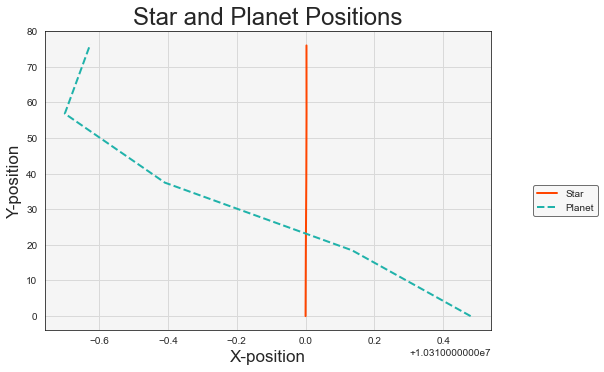

In [336]:
plt.clf() 

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

#################################### plotting data #######################################################
# plotting data as a scatter plot
#plt.scatter(pos_star_wp[:,0], pos_star_wp[:,1], color='orangered', label='Star', s=55, marker='*') 
#plt.scatter(pos_planet_wp[:,0], pos_planet_wp[:,1], color='lightseagreen', s=55, label='Planet') 

# plotting data as lines 
plt.plot(pos_star_wp[:,0], pos_star_wp[:,1], color='orangered',linewidth=2, markersize=12, label='Star')
plt.plot(pos_planet_wp[:,0], pos_planet_wp[:,1], color='lightseagreen',linewidth=2, markersize=12, label='Planet', linestyle='dashed')

############################################################################################################ 

# creating titles 
plt.title('Star and Planet Positions',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
         
plt.show() 

## Comparing astrometric signals

Creating a plot for the astrometric signals of the simulation with and without the planets to look at their simularities/differences 

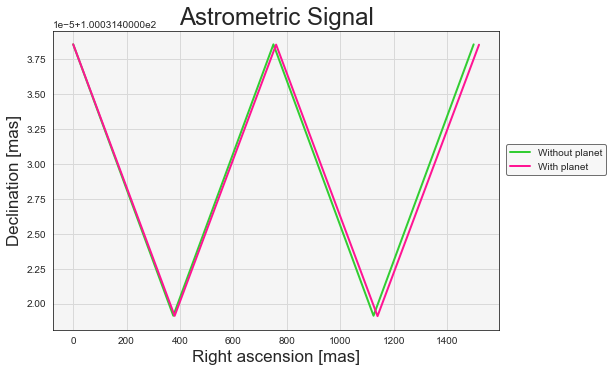

In [337]:
plt.clf()  

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# set titles 
plt.title('Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# setting x and y limits 
#plt.xlim([-20, 270])
#plt.ylim([-0.30e15,0.30e15])

#################################### plotting data #######################################################
# plot data as scatter
#plt.scatter(alpha, delta, color='limegreen', label='Without planet', s=55) 
#plt.scatter(alpha_wp, delta_wp, color='deeppink', label='With planet', s=55) 

# plotting data as lines 
plt.plot(alpha, delta, color='limegreen',linewidth=2, markersize=12, label='Without planet')
plt.plot(alpha_wp, delta_wp, color='deeppink',linewidth=2, markersize=12, label='With planet')

############################################################################################################ 
  
# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

plt.show() 

# Reproducing astrometric signal using equations 3.22 and 3.23

#### Setting the planets 

In [342]:
planets = ['Earth', 'Planet from Figure 3.1']

N = len(planets)
print('The number of planets is:',N)

The number of planets is: 2


# Thiele-Innes Constants

#### Setting constants needed 

## <span style='background :red' > <span style='color:white'> Set conditions properly  </span>

 </span>

In [396]:
a = [1,0.6]                         # semi-major axis in units of AU
omega = [1.99330266505,0]           # argument of perihelion
OMEGA = [-0.1965352438813,0]        # longitude of the ascending node 
i = [0,0]                           # orbital inclination (rad)

In [397]:
A = np.zeros((N,1))
B = np.zeros((N,1))
F = np.zeros((N,1))
G = np.zeros((N,1))
C = np.zeros((N,1))
H = np.zeros((N,1))

In [398]:
k = 0
for k in range(N):
    
    A[k] = a[k]*(np.cos(omega[k])*np.cos(OMEGA[k])-np.sin(omega[k])*np.sin(OMEGA[k])*np.cos(i[k]))
    
    B[k] = a[k]*(np.cos(omega[k])*np.sin(OMEGA[k])+np.sin(omega[k])*np.cos(OMEGA[k])*np.cos(i[k]))
    
    F[k] = a[k]*(-np.sin(omega[k])*np.cos(OMEGA[k])-np.cos(omega[k])*np.sin(OMEGA[k])*np.cos(i[k]))
    
    G[k] = a[k]*(-np.sin(omega[k])*np.sin(OMEGA[k])+np.cos(omega[k])*np.cos(OMEGA[k])*np.cos(i[k]))
    
    C[k] = a[k]*np.sin(omega[k])*np.sin(i[k])
    
    H[k] = a[k]*np.cos(omega[k])*np.sin(i[k])

### Wright & Howard state that the Thiele-Innes constants have the identity $a^2=A^2+B^2+C^2=F^2+G^2+H^2$

#### Check for earth:

In [399]:
print('a^2 for earth is equal to:',a[0]**2, 'AU^2')

a^2 for earth is equal to: 1 AU^2


In [400]:
print('A^2+B^2+C^2',A[0]**2+B[0]**2+C[0]**2,'[units]^2')

A^2+B^2+C^2 [1.] [units]^2


In [401]:
print('F^2+G^2+H^2',F[0]**2+G[0]**2+H[0]**2,'[units]^2')

F^2+G^2+H^2 [1.] [units]^2


#### Check for the other planet:

In [402]:
print('a^2 for earth is equal to:',a[1]**2, 'AU^2')

a^2 for earth is equal to: 0.36 AU^2


In [403]:
print('A^2+B^2+C^2',A[1]**2+B[1]**2+C[1]**2,'[units]^2')

A^2+B^2+C^2 [0.36] [units]^2


In [404]:
print('F^2+G^2+H^2',F[1]**2+G[1]**2+H[1]**2,'[units]^2')

F^2+G^2+H^2 [0.36] [units]^2


## Elliptical rectangular coordinates

#### Calculating the period $T$ using the equation: $T \propto a^{3/2}$ (Keplers third law)

In [352]:
T = np.zeros((N,1))

In [353]:
for ii in range(N): 
    T[ii] = a[ii]**(3/2)
    print('The period of',planets[ii],'is',T[ii], 'years')

The period of Earth is [1.] years
The period of Planet from Figure 3.1 is [0.464758] years


#### Calculating the mean motion $n$ using the equation: $n=\frac{2\pi}{T}$ (Solar System Dynamics equation 2.25)

In [354]:
n = np.zeros((N,1))

In [355]:
for jj in range(N):
    n[jj] = (2*np.pi)/T[jj]
    print('The value of n for',planets[ii],'is',n[jj])

The value of n for Planet from Figure 3.1 is [6.28318531]
The value of n for Planet from Figure 3.1 is [13.51926225]


#### Setting the time of pericentre passage for both objects 

## <span style='background :red' > <span style='color:white'> Set $\tau$ properly  </span>

 </span>

In [356]:
tau = [0,0]  

#### Calculating mean anomaly $M$ using the equation: $M=n(t-\tau)$ (Solar System Dynamics equation 2.39)

## <span style='background :red' > <span style='color:white'> Calculate $M$ properly  </span>

 </span>

In [357]:
M = np.zeros((m,2))

In [358]:
for jjj in range(m):
    
    M[:,0] = n[0]
    M[:,1] = n[1]

#### Setting the ellipticity of the orbits 

In [360]:
e = [0.0167,0.2]                    

#### Calculating the Eccentric anomaly $E$ using rebound

In [361]:
E = np.zeros((m,2))

In [362]:
v = 0
for v in range(m): 
    E[:,0] = rebound.M_to_E(e[0],M[v,0]) #(e,M)
    E[:,1] = rebound.M_to_E(e[1],M[v,1]) #(e,M)

#### Calculating the elliptical rectangular coordinates using the equations $X=\cos(E(t))-e$ and $Y=\sqrt{(1-e^2)}\sin(E(t))$ (Exoplanet handbook equations 3.21)

In [364]:
X = np.zeros((m,2))
Y = np.zeros((m,2))

In [365]:
g = 0
for g in range(m): 
    X[:,0] = np.cos(E[g,0]) - e[0]
    X[:,1] = np.cos(E[g,1]) - e[1]
    
    Y[:,0] = np.sqrt(1-e[0]**2) * np.sin(E[g,0])
    Y[:,1] = np.sqrt(1-e[1]**2) * np.sin(E[g,1])

## $\Pi$

#### $r_x,r_y$ and $r_z$ are the cartesian components of the observer position w.r.t the solar system barycentre. The observer is the <span style='background :red' > <span style='color:white'> Earth?  </span> </span>

In [368]:
r = pos_earth_wp

Setting $\alpha$ and $\delta$

## <span style='background :red' > <span style='color:white'> Set values properly  </span>

 </span>

In [370]:
alpha1 = 1
delta1 = 1

#### Calculating $\Pi_{\alpha,t}$ and $\Pi_{\delta,t}$ using equation 3.24 from the Exoplanet handbook

In [504]:
PI = np.zeros((m,2))

In [505]:
u = 0
for u in range(m):
    PI[u,0] = r[u,0]*np.sin(alpha1) - r[u,1]*np.cos(alpha1)
    PI[u,1] = (r[u,0]*np.cos(alpha1)+r[u,1]*np.sin(alpha1))*np.sin(delta1) - r[u,2]*np.cos(delta1)

## Final equations 

## <span style='background :red' > <span style='color:white'> Overall shorten code  </span>

 </span>

#### Calculate the sums $\sum_{j=0}^{n_p}[B_jX_{j,t}+G_jY_{j,t}]$ and $\sum_{j=0}^{n_p}[A_jX_{j,t}+F_jY_{j,t}]$

In [507]:
sum_elements = np.zeros((m,2))

In [508]:
o = 0
for o in range(m):
    sum_elements[o,0] = B[0]*X[o,0] + G[0]*Y[o,0] + B[1]*X[o,1] + G[1]*Y[o,1]
    sum_elements[o,1] = A[0]*X[o,0] + F[0]*Y[o,0] + A[1]*X[o,1] + F[1]*Y[o,1]

In [510]:
sum_alpha = np.sum(sum_elements[:,0])

In [522]:
sum_delta = np.sum(sum_elements[:,1])

#### Setting constants 

## <span style='background :red' > <span style='color:white'> Set values properly  </span>

 </span>

In [514]:
prop_RA = 0             # proper motion in RA direction
prop_DEC = 0             # proper motion in DEC direction 

parallax = 0
change_RA = 0
change_DEC = 0


t1 = 0
t0 = 0

#### Final equations from sum +  "other" $\Delta\alpha_0\cos\delta+\varpi\Pi_{\alpha,t}+\mu_\alpha(t-t_0)$ and $\Delta\delta_0+\varpi\Pi_{\delta,t}+\mu_\delta(t-t_0)$

In [516]:
three22 = np.zeros((m,1))
three23 = np.zeros((m,1))

In [517]:
d = 0
for d in range(m):
    three22[d] = sum_alpha + change_RA*np.cos(delta1) + parallax*PI[d,0] + prop_RA
    three23[d] = sum_delta + change_DEC + parallax*PI[d,1] + prop_DEC

#### Plot 

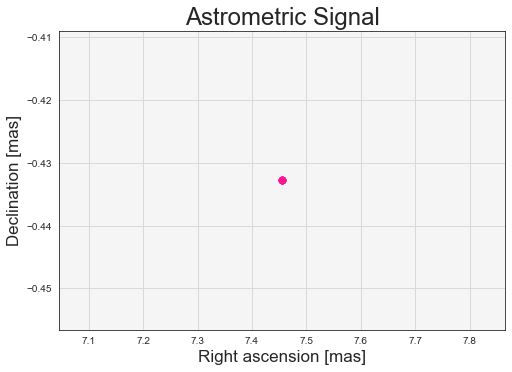

In [520]:
plt.clf()  

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# set titles 
plt.title('Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# setting x and y limits 
#plt.xlim([-20, 270])
#plt.ylim([-0.30e15,0.30e15])

#################################### plotting data #######################################################
# plot data as scatter
plt.scatter(three22,three23, color='deeppink', s=55) 

# plotting data as lines 
plt.plot(three22, three23, color='deeppink',linewidth=2, markersize=12)


############################################################################################################ 


plt.show() 